# Literature search about knee cartilage segmentation in MR images
Content under Creative Commons Attribution license CC-BY-NC-SA 4.0   
Code under GNU-GPL v3 License  
© 2019 Serena Bonaretti
---

- [Literature search criteria](#literature_search_criteria)
- [Analysing literature](#analysing_literature)  
  - [Openess and reproducibility](#openess_and_reproducibility) 
  - [Types of algorithm](#types_of_algorithm) 
- [Dependencies](#dependences)

<a name="literature_search_criteria"></a>
## Literature search criteria

Following the criteria below, I have created a table summarizing the literature on knee cartilage segmentation in magnetic resonance (MR) images. The table is in the file [knee_segm_literature.csv](https://github.com/sbonaretti/pyKNEEr/blob/master/publication/data/knee_segm_literature.csv)   

Criteria to search for **publications**:  
- From previously known literature:
    - Pedoia V, Majumdar S, Link T. [Segmentation of joint and musculoskeletal tissue in the study of arthritis](https://www.ncbi.nlm.nih.gov/pubmed/26915082). MAGMA. Apr;29(2):207-21. 2016. 
    - Zhang B, Zhang Y, Cheng HD, Xian M, Gai S, Cheng O, Huang K. [Computer-Aided Knee Joint Magnetic Resonance Image Segmentation - A Survey](https://arxiv.org/pdf/1802.04894.pdf)
    - Segmentation of Knee Images 2010 - Grand Challenge Workshop MICCAI ([ski10](http://www.ski10.org/results.php))
- From search engines: 
    - websites:
      - [google scholar](https://scholar.google.com/)  
      - [pubmed](https://www.ncbi.nlm.nih.gov/pubmed/)
    - keywords:
      - "knee cartilage segmentation"
- In [google.com](https://www.google.com/), while searching for material related to other publications 

Criteria to search for **open source material** for each publication:
- *paper*:  
  - [google scholar](https://scholar.google.com/) (the link in the table might be one of the possible open-source links)
  - [pubmed](https://www.ncbi.nlm.nih.gov/pubmed/)
- *data*:
  - Searched for the dataset used in the paper's paragraph describing the *Material* used
- *code*: 
  - In the publication text: 
    - Searched for keywords:
        - *code* 
        - *sofware* 
        - *repository*   
        - *github* 
        - *gitlab* 
        - *bitbucket*
    -  Searched for link or info in the *Methods* paragraph describing used language and libraries (if present)
  - In [google.com](https://www.google.com/): searched for:
    - *github paper_title*   
    - *gitlab paper_title*    
    - *bitbucket paper_title* 
  
Note: Conference proceeding similar to published papers were excluded


--- 

In [1]:
import numpy   as np
import pandas  as pd
from   geopy.geocoders import Nominatim

In [2]:
# use R to create the plot using ggplot2 
import os # comment if used in mybinder, uncomment if used locally
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources' # comment if used in mybinder, uncomment if used locally

In [3]:
# install R packages (only once)
#%%R
#install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("ggmap", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("maps", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("mapdata", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("magrittr", repos='http://cran.us.r-project.org', quiet=TRUE)
#install.packages("ggrepel", repos='http://cran.us.r-project.org', quiet=TRUE)

In [4]:
%load_ext rpy2.ipython

--- 

<a name="analysing_literature"></a>
## Analysing literature

### Load the file

In [5]:
# load literature table
file_name = "cart_segm_literature.csv" # local address
# file on github: https://github.com/sbonaretti/pyKNEEr/blob/master/publication/data/knee_segm_literature.csv
literature = pd.read_csv(file_name)

---

<a name="openess_and_reproducibility"></a>
### Openess and reproducibility

In [6]:
# get the columns about openess and reproducibility
open_repro = literature.loc[:, ["link_to_open_source_publication", 
                                "link_to_open_source_code_in_publication", "link_to_open_source_code_in_google.com", 
                                "dataset",
                                "bibtex_id"]]
# changing columns name where needed
open_repro.rename(columns={"link_to_open_source_code_in_google.com": "link_to_open_source_code_in_google"}, inplace=True)
display(open_repro)

,link_to_open_source_publication,link_to_open_source_code_in_publication,link_to_open_source_code_in_google,dataset,bibtex_id
0,http://citeseerx.ist.psu.edu/viewdoc/download?...,NaN,NaN,private,Solloway_1997
1,http://www.ski10.org/data/2011-01-27-1131.pdf,NaN,NaN,OAI,Vincent_2011
2,NaN,NaN,NaN,private,Williams_2010
3,http://www.diagnijmegen.nl/~bram/grandchalleng...,NaN,NaN,SKI10,Amberg_2010
4,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN,NaN,private,CarballidoGamio_2008
5,https://s3.amazonaws.com/academia.edu.document...,NaN,NaN,OAI,TamezPena_2012
6,http://wwwx.cs.unc.edu/~mn/sites/default/files...,NaN,https://bitbucket.org/marcniethammer/ksrt/wiki...,PLS and SKI10,Shan_2014
7,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,NaN,private,Pedoia_2015
8,NaN,NaN,NaN,OAI,Ozturk_2016
9,https://www.researchgate.net/profile/Yongming_...,NaN,NaN,private,WangP_2016


#### How many publications are open access?

In [7]:
open_repro.query('link_to_open_source_publication != "NaN"').link_to_open_source_publication.count()

25

##### Which are the open access publications?

In [8]:
open_publications = open_repro[~open_repro.link_to_open_source_publication.isnull()].bibtex_id.to_frame()
open_publications.index = np.arange(1,len(open_publications)+1)  
display(open_publications)

,bibtex_id
1,Solloway_1997
2,Vincent_2011
3,Amberg_2010
4,CarballidoGamio_2008
5,TamezPena_2012
6,Shan_2014
7,Pedoia_2015
8,WangP_2016
9,Yin_2010
10,Bae_2009


#### How many publications contain links to repositories?

In [9]:
open_repro.query('link_to_open_source_code_in_publication != "NaN"').link_to_open_source_code_in_publication.count()

0

#### How many code repositories can be find with a Google search?

In [10]:
open_repro.query('link_to_open_source_code_in_google != "NaN"').link_to_open_source_code_in_google.count()

2

##### Which are the papers corresponding to code repositories found in Google?

In [11]:
open_code = open_repro[~open_repro.link_to_open_source_code_in_google.isnull()].bibtex_id.to_frame()
open_code.index = np.arange(1,len(open_code)+1)  
display(open_code)

,bibtex_id
1,Shan_2014
2,WangZ_2013


#### How many studies used public data (with/without private data)?

In [12]:
open_repro.query('dataset != "private" & dataset != "NaN" ').dataset.count()

18

##### Which are the studies that used public data (with/without private data)?

In [13]:
public_data = open_repro[open_repro.dataset != "private"].bibtex_id.to_frame()
dataset_column = open_repro[open_repro.dataset != "private"].dataset.to_frame()
public_data['dataset'] = dataset_column
public_data.index = np.arange(1,len(public_data)+1)  
display(public_data)

,bibtex_id,dataset
1,Vincent_2011,OAI
2,Amberg_2010,SKI10
3,TamezPena_2012,OAI
4,Shan_2014,PLS and SKI10
5,Ozturk_2016,OAI
6,Yin_2010,OAI
7,Bae_2009,OAI
8,Shim_2009,OAI
9,Liu_2015,SKI10
10,Norman_2018,private + OAI


---

<a name="types_of_algorithm"></a>
### Types of algorithm

In [14]:
# get the columns about algorithms, geographic location, and year
algos = literature.loc[:, ["algorithm_type", 
                           "city_last_author", "affiliation_last_author", "country_last_author", 
                           "year",
                           "bibtex_id"]]
algos["bibtex_id"] = algos["bibtex_id"].str.replace("_", " (")
algos["bibtex_id"] = algos["bibtex_id"] + ")"
#display(algos)

In [15]:
# get latitude and longitude of city_last_author
# if timeout error message, try again
nom = Nominatim(user_agent="specify_your_app_name_here") # specify a name to avoid timeout errors
algos["coordinates"] = algos["city_last_author"].apply(nom.geocode) # create the intermediate columm "coordinates" to take advantage of pandas apply() method
algos["latitude"]    = algos["coordinates"].apply(lambda x: x.latitude if x!=None else None) # take advantage of pandas apply() method to avoid for loop
algos["longitude"]   = algos["coordinates"].apply(lambda x: x.longitude if x!=None else None) 
algos = algos.drop(columns="coordinates") # delete the column "coordinates" (altair will not be able to read it (even if not used))
algos
    

,algorithm_type,city_last_author,affiliation_last_author,country_last_author,year,bibtex_id,latitude,longitude
0,active contours,Manchester,"Department of Medical Biophysics, University o...",UK,1997,Solloway (1997),53.479489,-2.245115
1,active contours,Manchester,Imorphics Ltd.,UK,2011,Vincent (2011),53.479489,-2.245115
2,active contours,Manchester,"Imaging Science and Biomedical Engineering, Sc...",UK,2010,Williams (2010),53.479489,-2.245115
3,active contours,Basel,"Computer Science Department, University of Basel",Switzerland,2010,Amberg (2010),47.558108,7.587826
4,active contours,San Francisco,Department of Radiology and\nBiomedical Imagin...,USA,2008,CarballidoGamio (2008),37.779281,-122.419236
5,atlas-based,Rochester,"Qmetrics Technology, LLC",USA,2012,TamezPena (2012),43.157285,-77.615214
6,atlas-based,Chapel Hill,"Department of Computer Science, University of ...",USA,2014,Shan (2014),35.913154,-79.055780
7,atlas-based,San Francisco,Department of Radiology and\nBiomedical Imagin...,USA,2015,Pedoia (2015),37.779281,-122.419236
8,graph-based,Istanbul,"Yıldız Technical University, Computer Engineer...",Turkey,2016,Ozturk (2016),41.009633,28.965165
9,graph-based,Chongqing,"Department of Medical Imaging, College of Biom...",China,2016,WangP (2016),29.558571,106.549282


R[write to console]: Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

R[write to console]: Please cite ggmap if you use it! See citation("ggmap") for details.



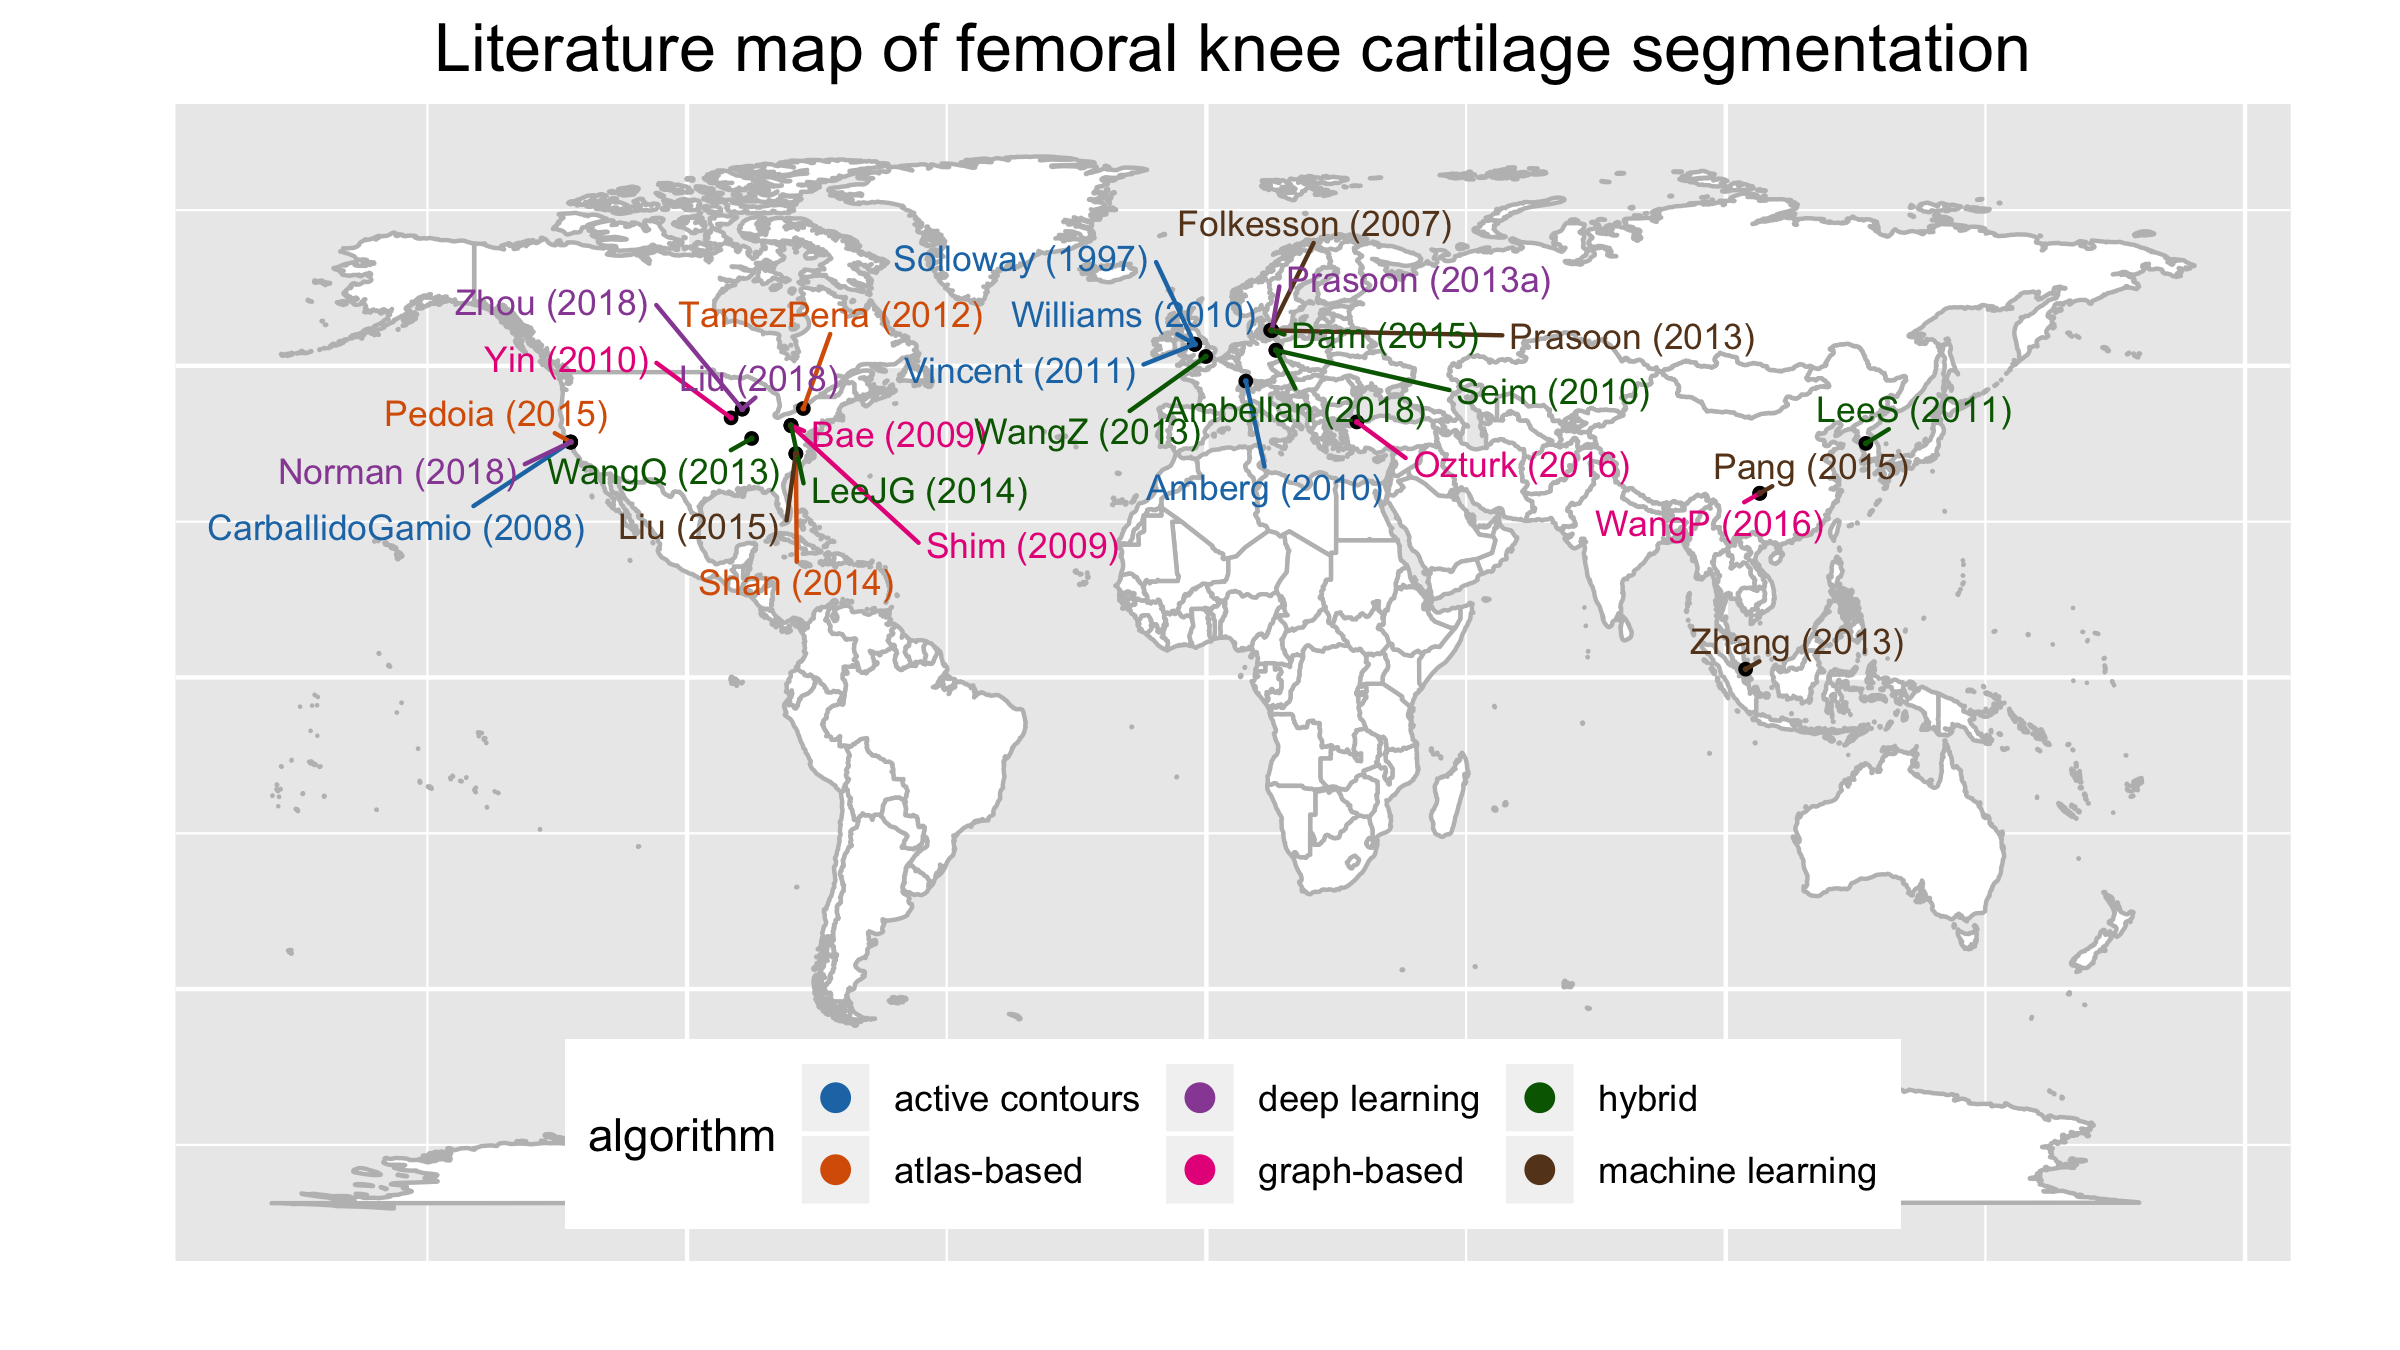

In [16]:
%%R -i algos -w 8 -h 4.5 --units in -r 300
library(ggplot2)
library(ggmap)
library(ggrepel)

# get the map from ggmap
thismap = map_data("world")
# extract information needed for graph
cities = data.frame(
    bibtex_id = algos$bibtex_id,
    lon       = algos$longitude,
    lat       = algos$latitude,
    algorithm = algos$algorithm_type
)

# plot
ggplot(thismap, aes(long, lat)) +
    # plot the map
    geom_polygon(aes(group = group), fill="white", colour="gray") + 
    # plot the cities
    geom_point(data = cities, aes(lon, lat), size = 1) +            
    # graph ratio
    coord_fixed(ratio = 1.2) +
    # author names on map
    geom_text_repel(data = cities, 
                    aes(lon, lat, label = bibtex_id, color = algorithm), 
                    seed = 120,
                    size  = 3,
                    min.segment.length = 0.0,
                    show_guide = FALSE) +  # don't show legend because it shows 'a' instead of circles
    # add points with the same characteristics as geom_text_repel but size 0 to overwrite legend
    geom_point(data = cities, aes(lon, lat, color = algorithm), size = 0) +
    # color palette
    scale_colour_manual(values = c("#1f78b4", "#d95f02", "#984ea3","#e7298a", "#006400", "#654321"), # colors of text
                        guide=guide_legend(override.aes=list(size=2.8))) + # overwriting 'a' in legend with circle
    # background
    theme_grey() + # white background with grid lines
    # axis 
    xlab("") + # would be 'long'
    ylab("") + # would be 'lat'
    # ticks 
    theme( axis.text.x = element_blank(), axis.text.y = element_blank(), axis.ticks = element_blank()) + # ticks and text off
    # title
    ggtitle("Literature map of femoral knee cartilage segmentation") +
    theme(plot.title = element_text(size=16, hjust = 0.5)) + # title font size + title to center
    # legend
    theme(legend.position  = c(0.50, 0.11), # inside the graph
          legend.direction="horizontal",    # diplayed horizontally
          ) 

In [17]:
# %%R # comment if used in mybinder, uncomment if used locally
# ggsave("fig_map_liter.pdf", plot = last_plot(), width=8, height=4.5, dpi=300) # comment if used in mybinder, uncomment if used locally

---

<a name="dependences"></a>
## Dependencies

In [18]:
%load_ext watermark
%watermark -v -m -p numpy,pandas,scipy
print (" ")
%watermark -u -n -t -z

CPython 3.7.3
IPython 7.4.0

numpy 1.17.1
pandas 0.24.2
scipy 1.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
 
last updated: Wed Oct 16 2019 10:41:58 CEST


In [19]:
%%R
sessionInfo()

R version 3.3.3 (2017-03-06)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.13.6

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] maps_3.3.0    ggrepel_0.8.1 ggmap_3.0.0   ggplot2_3.1.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1        magrittr_1.5      tidyselect_0.2.5  munsell_0.5.0    
 [5] colorspace_1.3-2  rjson_0.2.20      R6_2.4.0          jpeg_0.1-8       
 [9] rlang_0.3.4       stringr_1.3.1     httr_1.4.0        plyr_1.8.4       
[13] dplyr_0.8.1       grid_3.3.3        gtable_0.2.0      png_0.1-7        
[17] withr_2.1.2       digest_0.6.18     lazyeval_0.2.1    assertthat_0.2.1 
[21] tibble_2.1.1      crayon_1.3.4      tidyr_0.8.3       purrr_0.3.2      
[25] bitops_1.0-6      glue_1.3.1        labeling_0.3      stringi_1.2.4    
[29] pillar_1.4.0      RgoogleMaps_1.4.